In [1]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import difflib
import timeit

from rl import *
from mdp import *
from utils import *

%matplotlib inline

np.random.seed(0)

In [2]:
gridmdp_small = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [3]:
optimal_policy_small = best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = 0.0)[0])

In [4]:
def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return np.flip(utility_array, 0)

"""vi_utility_array = utility_dict_toarray(U_vi, (3,4))

print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)
vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")"""

'vi_utility_array = utility_dict_toarray(U_vi, (3,4))\n\nprint(vi_utility_array)\n\nutility_array_df = pd.DataFrame(vi_utility_array)\nvi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")'

In [5]:
###Function to return % match strategy 
def strat_match_pct(strat1, strat2, states):
    optimal = [strat1.get(state) for state in sorted(states)]
    suboptimal = [strat2.get(state) for state in sorted(states)]
    sm = difflib.SequenceMatcher(None,optimal,suboptimal)
    sm_ratio = sm.ratio()
    return sm_ratio

In [21]:
def q_policy(q_agent, mdp_problem):
    policy = {}
    for state in mdp_problem.states:
        if state not in mdp_problem.terminals:
            qvals = []
            for action in mdp_problem.actions(state):
                qvals.append(q_agent.Q.get((state,action)))
            try:
                policy[state] = actions[qvals.index(max(qvals))]
            except:
                pass
    return policy

978
0.10047118222428253
{(0, 1): (0, 1), (1, 2): (1, 0), (0, 0): (0, 1), (3, 0): (-1, 0), (2, 1): (0, 1), (2, 0): (0, 1), (2, 2): (1, 0), (1, 0): (1, 0), (0, 2): (1, 0)}
>   >      >   None
^   None   ^   None
^   >      ^   <   


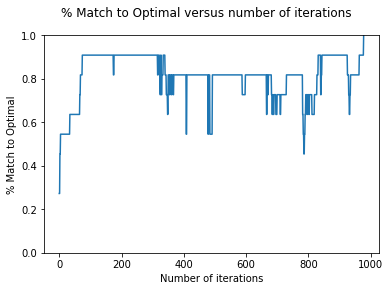

In [51]:

q_agent = QLearningAgent(gridmdp_small, Ne=100, Rplus=1, alpha=lambda n: 100./(99+n))

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

#Average iterations until convergence 

match_pcts = []

start_time = timeit.default_timer()

for i in range(10000):
    run_single_trial(q_agent,gridmdp_small)
    policy = q_policy(q_agent, gridmdp_small)
    match_pct = strat_match_pct(optimal_policy_small, policy, gridmdp_small.states)
    match_pcts.append(match_pct)
    if match_pct == 1.0:
        print(i)
        break

elapsed = timeit.default_timer() - start_time
print(elapsed)

plt.plot(match_pcts)


policy = q_policy(q_agent, gridmdp_small)

plt.suptitle("% Match to Optimal versus number of iterations")
plt.ylabel("% Match to Optimal")
plt.xlabel("Number of iterations")
plt.ylim((0,1))

print(policy)
print_table(gridmdp_small.to_arrows(policy))

#print(q_agent.Q)

704
0.07157333333452698
{(0, 1): (0, 1), (1, 2): (1, 0), (0, 0): (0, 1), (3, 0): (-1, 0), (2, 1): (0, 1), (2, 0): (0, 1), (2, 2): (1, 0), (1, 0): (1, 0), (0, 2): (1, 0)}
>   >      >   None
^   None   ^   None
^   >      ^   <   


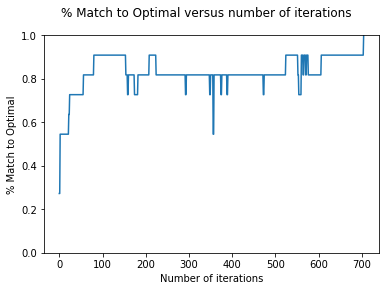

In [53]:
q_agent = QLearningAgent(gridmdp_small, Ne=50, Rplus=1, alpha=lambda n: 100./(99+n))

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

#Average iterations until convergence 

match_pcts = []

start_time = timeit.default_timer()

for i in range(10000):
    run_single_trial(q_agent,gridmdp_small)
    policy = q_policy(q_agent, gridmdp_small)
    match_pct = strat_match_pct(optimal_policy_small, policy, gridmdp_small.states)
    match_pcts.append(match_pct)
    if match_pct == 1.0:
        print(i)
        break

elapsed = timeit.default_timer() - start_time
print(elapsed)

plt.plot(match_pcts)


policy = q_policy(q_agent, gridmdp_small)

plt.suptitle("% Match to Optimal versus number of iterations")
plt.ylabel("% Match to Optimal")
plt.xlabel("Number of iterations")
plt.ylim((0,1))

print(policy)
print_table(gridmdp_small.to_arrows(policy))

#print(q_agent.Q)

480
0.051613582221762044
{(0, 1): (0, 1), (1, 2): (1, 0), (0, 0): (0, 1), (3, 0): (-1, 0), (2, 1): (0, 1), (2, 0): (0, 1), (2, 2): (1, 0), (1, 0): (1, 0), (0, 2): (1, 0)}
>   >      >   None
^   None   ^   None
^   >      ^   <   


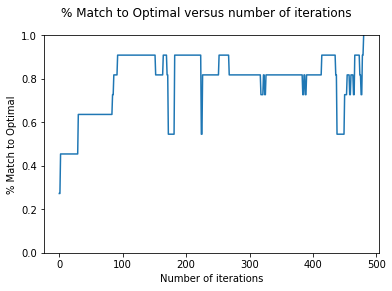

In [55]:
q_agent = QLearningAgent(gridmdp_small, Ne=50, Rplus=1, alpha=lambda n: 60./(59+n))

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

#Average iterations until convergence 

match_pcts = []

start_time = timeit.default_timer()

for i in range(10000):
    run_single_trial(q_agent,gridmdp_small)
    policy = q_policy(q_agent, gridmdp_small)
    match_pct = strat_match_pct(optimal_policy_small, policy, gridmdp_small.states)
    match_pcts.append(match_pct)
    if match_pct == 1.0:
        print(i)
        break

elapsed = timeit.default_timer() - start_time
print(elapsed)


plt.plot(match_pcts)


policy = q_policy(q_agent, gridmdp_small)

plt.suptitle("% Match to Optimal versus number of iterations")
plt.ylabel("% Match to Optimal")
plt.xlabel("Number of iterations")
plt.ylim((0,1))

print(policy)
print_table(gridmdp_small.to_arrows(policy))

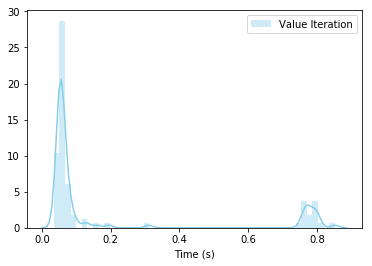

In [70]:


q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

#Average iterations until convergence 

match_iters = []
match_time = []

for x in range(100):
    q_agent = QLearningAgent(gridmdp_small, Ne=50, Rplus=1, alpha=lambda n: 60./(59+n))
    start_time = timeit.default_timer()
    for i in range(10000):
        run_single_trial(q_agent,gridmdp_small)
        policy = q_policy(q_agent, gridmdp_small)
        match_pct = strat_match_pct(optimal_policy_small, policy, gridmdp_small.states)
        if match_pct == 1.0:
            match_iters.append(i)
            break
    elapsed = timeit.default_timer() - start_time
    match_time.append(elapsed)

print(zip(match_time, match_iters))

times_df = pd.DataFrame({'Time to Converge':match_time})

sns.distplot( times_df["Time to Converge"] , color="skyblue", label="Value Iteration")
plt.xlabel("Time (s)")
plt.legend()


[(0.07350300444522873, 714), (0.04902741333353333, 514), (0.7611153066682164, 324), (0.7709769955545198, 1202), (0.03425223111116793, 520), (0.1259551288858347, 554), (0.04950840889068786, 528), (0.8019609599978139, 470), (0.05337201778093004, 572), (0.056614968889334705, 1366), (0.05305713777852361, 568), (0.05896874666723306, 504), (0.13163463111050078, 530), (0.7995141688879812, 680), (0.05311544888900244, 566), (0.04678001777938334, 548), (0.048349582222726895, 524), (0.06501461333027692, 730), (0.05301134222463588, 612), (0.7706976711124298, 730), (0.052043377778318245, 546), (0.05187185778049752, 526), (0.7972815644461662, 598), (0.06958108444450772, 506), (0.0580556799977785, 568), (0.07031722666579299, 674), (0.05183800888698897, 520), (0.05568312888863147, 548), (0.05815608888951829, 542), (0.051417884445982054, 510), (0.05484430222350056, 520), (0.062668515554833, 650), (0.051679857777344296, 470), (0.05513528889059671, 610), (0.052937671109248186, 626), (0.7536722488875967, 

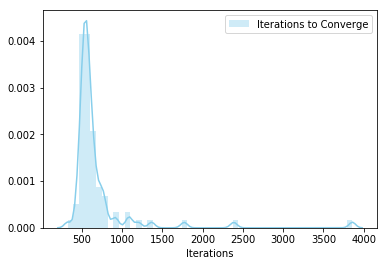

In [71]:
times_df = pd.DataFrame({'Iterations to Converge':match_iters})

sns.distplot( times_df["Iterations to Converge"] , color="skyblue", label="Iterations to Converge")
plt.xlabel("Iterations")
plt.legend()

print(list(zip(match_time, match_iters)))

In [ ]:
times_df = pd.DataFrame({'Time to Converge':match_time})

sns.distplot( times_df["Time to Converge"] , color="skyblue", label="Time to Converge")
plt.xlabel("Time (s)")
plt.legend()

In [33]:
setup = '''


import difflib

from rl import QLearningAgent, run_single_trial
from mdp import GridMDP, best_policy, value_iteration

gridmdp_small = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.9)

optimal_policy_small = best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = 0.0)[0])


q_agent = QLearningAgent(gridmdp_small, Ne=10, Rplus=1, alpha=lambda n: 1./(n))

def q_policy(q_agent, mdp_problem, actions =  [(1, 0), (0, 1), (-1, 0), (0, -1)]):
    policy = {}
    for state in mdp_problem.states:
        qvals = []
        for action in actions:
            qvals.append(q_agent.Q.get((state,action)))
        try:
            policy[state] = actions[qvals.index(max(qvals))]
        except:
            pass
    return policy

def strat_match_pct(strat1, strat2, states):
    optimal = [strat1[state] for state in sorted(states)]
    suboptimal = [strat2[state] for state in sorted(states)]
    sm = difflib.SequenceMatcher(None,optimal,suboptimal)
    sm_ratio = sm.ratio()
    return sm_ratio
'''


q_setup = '''for i in range(1000):
    run_single_trial(q_agent,gridmdp_small)
    policy = q_policy(q_agent, gridmdp_small)
    match_pct = strat_match_pct(optimal_policy_small, policy, gridmdp_small.states)
    if match_pct == 1.0:
        break'''

q_time = timeit.Timer(q_setup, setup = setup).repeat(100,10)
pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=3)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp, epsilon=1)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time, 'Q Learning':q_time})

sns.distplot( times_df["Q Learning"] , color="green", label="Q Learning")
sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

KeyError: (0, 2)

# Large MDP

In [28]:
gridmdp_large = GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])

optimal_policy_large = best_policy(gridmdp_large, value_iteration(gridmdp_large, epsilon = 0.0)[0])

In [45]:
from rl import *
q_agent = QLearningAgent(gridmdp, Ne=5, Rplus=2, alpha=lambda n: 60./(59+n))

for i in range(100000):
    run_single_trial(q_agent,gridmdp)

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

def q_policy(q_agent, mdp_problem):
    policy = {}
    for state in gridmdp.states:
        qvals = []
        for action in actions:
            qvals.append(q_agent.Q.get((state,action)))
        try:
            policy[state] = actions[qvals.index(max(qvals))]
        except:
            pass
    return policy

policy = q_policy(q_agent, gridmdp)

print(policy)
print_table(gridmdp.to_arrows(policy))

#print(q_agent.Q)

{(7, 3): (0, -1), (1, 3): (1, 0), (3, 0): (1, 0), (0, 2): (1, 0), (2, 1): (1, 0), (6, 2): (1, 0), (2, 5): (1, 0), (0, 3): (1, 0), (7, 2): (0, -1), (4, 0): (0, 1), (1, 2): (1, 0), (3, 3): (1, 0), (5, 5): (1, 0), (4, 4): (0, -1), (6, 3): (0, -1), (1, 5): (1, 0), (5, 0): (-1, 0), (2, 2): (1, 0), (0, 4): (0, -1), (4, 1): (0, 1), (6, 4): (0, -1), (3, 2): (1, 0), (0, 0): (1, 0), (4, 5): (1, 0), (5, 2): (1, 0), (6, 0): (-1, 0), (7, 5): (0, -1), (0, 5): (1, 0), (2, 3): (1, 0), (4, 2): (1, 0), (1, 0): (1, 0), (6, 5): (1, 0), (3, 5): (1, 0), (0, 1): (0, 1), (5, 3): (1, 0), (6, 1): (1, 0), (3, 1): (1, 0), (7, 4): (0, -1), (2, 0): (1, 0), (4, 3): (1, 0), (3, 4): (1, 0), (2, 4): (0, -1)}
>   >      >   >   >   >      >   v   
v   None   v   >   v   None   v   v   
>   >      >   >   >   >      v   v   
>   >      >   >   >   >      >   v   
^   None   >   >   ^   None   >   None
>   >      >   >   ^   <      <   None


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


(0, 1)

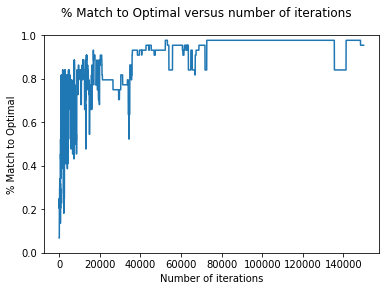

In [73]:
match_pcts = []

q_agent_l = QLearningAgent(gridmdp_large, Ne=300, Rplus=1, alpha=lambda n: 100./(99 + n))

for i in range(150000):
    if i % 10000 == 0:
        print(i)
    run_single_trial(q_agent_l,gridmdp_large)
    policy = q_policy(q_agent_l, gridmdp_large)
    match_pct = strat_match_pct(optimal_policy_large, policy, gridmdp_large.states)
    match_pcts.append(match_pct)
    if match_pct == 1.0:
        break

plt.plot(match_pcts)

policy = q_policy(q_agent_l, gridmdp_large)

plt.suptitle("% Match to Optimal versus number of iterations")
plt.ylabel("% Match to Optimal")
plt.xlabel("Number of iterations")
plt.ylim((0,1))

#print(policy)
#print_table(gridmdp.to_arrows(policy))

#print(q_agent.Q)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


(0, 1)

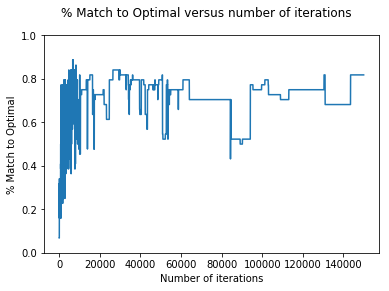

In [77]:
match_pcts = []

q_agent_l = QLearningAgent(gridmdp_large, Ne=340, Rplus=1, alpha=lambda n: 100./(99 + n))

for i in range(150000):
    if i % 10000 == 0:
        print(i)
    run_single_trial(q_agent_l,gridmdp_large)
    policy = q_policy(q_agent_l, gridmdp_large)
    match_pct = strat_match_pct(optimal_policy_large, policy, gridmdp_large.states)
    match_pcts.append(match_pct)
    if match_pct == 1.0:
        break

plt.plot(match_pcts)

policy = q_policy(q_agent_l, gridmdp_large)

plt.suptitle("% Match to Optimal versus number of iterations")
plt.ylabel("% Match to Optimal")
plt.xlabel("Number of iterations")
plt.ylim((0,1))

#print(policy)
#print_table(gridmdp.to_arrows(policy))

#print(q_agent.Q)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


(0, 1)

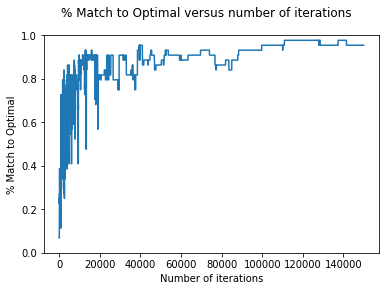

In [76]:
match_pcts = []

q_agent_l = QLearningAgent(gridmdp_large, Ne=360, Rplus=1, alpha=lambda n: 100./(99 + n))

for i in range(150000):
    if i % 10000 == 0:
        print(i)
    run_single_trial(q_agent_l,gridmdp_large)
    policy = q_policy(q_agent_l, gridmdp_large)
    match_pct = strat_match_pct(optimal_policy_large, policy, gridmdp_large.states)
    match_pcts.append(match_pct)
    if match_pct == 1.0:
        break

plt.plot(match_pcts)

policy = q_policy(q_agent_l, gridmdp_large)

plt.suptitle("% Match to Optimal versus number of iterations")
plt.ylabel("% Match to Optimal")
plt.xlabel("Number of iterations")
plt.ylim((0,1))

#print(policy)
#print_table(gridmdp.to_arrows(policy))

#print(q_agent.Q)

In [17]:
print_table(gridmdp_large.to_arrows(policy))

>   <      >   v   >   <      <   >   
<   None   >   <   <   None   ^   >   
<   ^      >   v   >   ^      >   v   
>   >      ^   >   ^   >      v   v   
^   None   >   >   ^   None   >   None
>   >      >   <   ^   ^      ^   None


In [47]:
###Getting converged value function
##Need to run this multiple times to get an average performance
##Also need to go through the Q learning algo to see what exactly is happening there

vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])



for x in 10*[10000]:
    q_agent_iter = QLearningAgent(gridmdp, Ne=5, Rplus=2)
    for i in range(x):
        run_single_trial(q_agent_iter, gridmdp)
    strat_match_pct(vi_converged, q_policy(q_agent_iter, gridmdp), gridmdp.states)



0.5227272727272727
0.5
0.5
0.5681818181818182
0.6136363636363636
0.6136363636363636
0.6818181818181818
0.36363636363636365
0.5909090909090909
0.5681818181818182


In [48]:
for x in 10*[100000]:
    q_agent_iter = QLearningAgent(gridmdp, Ne=5, Rplus=2)
    for i in range(x):
        run_single_trial(q_agent_iter, gridmdp)
    strat_match_pct(vi_converged, q_policy(q_agent_iter, gridmdp), gridmdp.states)

0.5227272727272727
0.5681818181818182
0.5681818181818182
0.7272727272727273
0.7045454545454546
0.6590909090909091
0.7045454545454546
0.4772727272727273
0.5681818181818182
0.45454545454545453


In [15]:
q_agent = QLearningAgent(gridmdp, Ne=5, Rplus=2, alpha=lambda n: 1000./(999+n))

for i in range(100000):
    run_single_trial(q_agent,gridmdp)

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

policy = {}
for state in gridmdp.states:
    qvals = []
    for action in actions:
        qvals.append(q_agent.Q.get((state,action)))
    try:
        policy[state] = actions[qvals.index(max(qvals))]
    except:
        pass
        
print_table(gridmdp.to_arrows(policy))

^   >      >   >   v   >      >   v   
>   None   >   v   v   None   >   <   
v   >      v   v   v   >      v   v   
>   >      >   >   >   >      >   v   
^   None   >   >   ^   None   ^   None
>   >      >   ^   ^   <      <   None


In [ ]:
print_table(gridmdp.to_arrows(pi))

In [ ]:
gridmdp_small_gamma = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.5)
